In [1]:
""" Cualquier librería adicional que necesiteis durante el ejercicio, importadlo en esta sección """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



"""
Importo estas dos funciones que usaré en el model evaluation
"""

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedKFold

# Ejercicio 2

Este ejercicio pretende poner en práctica la habilidad de limpiar datos y visualizar plots en para crear finalmente modelos en __sklearn__.

El estudiante tendrá que repasar los comandos realizados en clase y lidiar con posibles errores durante el desarrollo. 

Para facilitar y agilizar el desarrollo, el estudiante tendrá que rellenar los huecos marcados como '_# codigo-alumno_'. No obstante, si además el estudiante necesita ejecutar código adicional, siempre podrá utilizar cualquier celda adicional. 

El estudiante tendrá siempre que introducir una semilla (seed) que generará acorde a su fecha de nacimiento (sin ser intrusivos en edad).

Finalmente, la entrega será un fichero .ipynb cambiando nombre y apellido al fichero.

In [2]:
""" El estudiante tendrá que utilizar la semilla proporcionada para todos los procesos aleatorios """

seed = 17 + 13*9 #dia-nacimiento-estudiante + 13 * mes-nacimiento-estudiante

### Data cleansing

In [3]:
""" Leed el dataframe de sklearn llamado 'fetch_kddcup99' y almacenarlo en una variable llamada data """

from sklearn.datasets import fetch_kddcup99

data = fetch_kddcup99(as_frame=True)
pd_data = data.frame
pd_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [4]:
""" De entre todas las variables del dataframe, solo trabajaremos en 
    este ejercicio con las descritas en key_columns, por lo que tendréis que quitar el resto """

key_columns = ['duration', 'protocol_type', 'service', 'flag', 'logged_in', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate', 'labels']

pd_data = pd_data[key_columns]
pd_data.head()

,duration,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,labels
0,0,b'tcp',b'http',b'SF',1,8,8,0.0,9,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',1,8,8,0.0,19,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',1,8,8,0.0,29,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',1,6,6,0.0,39,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',1,6,6,0.0,49,0.0,b'normal.'


In [5]:
""" Comprobad que no haya nulos ni registros duplicados """

# codigo-alumno
pd_data.isnull().sum()


duration                    0
protocol_type               0
service                     0
flag                        0
logged_in                   0
count                       0
srv_count                   0
serror_rate                 0
dst_host_srv_count          0
dst_host_srv_serror_rate    0
labels                      0
dtype: int64

In [6]:
# Hay observaciones duplicadas
pd_data.duplicated().sum()

439856

In [7]:
pd_data = pd_data[~pd_data.duplicated()]# codigo-alumno
pd_data.duplicated().sum()

0

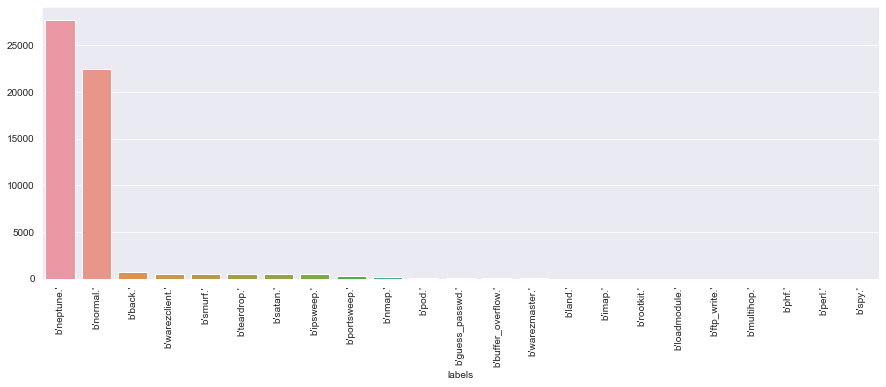

In [8]:
""" Mostrar un barplot para la variable objetivo (labels)"""

target = 'labels'

# codigo-alumno

x = pd_data.groupby([target]).size().sort_values(ascending=False) 


plt.figure(figsize = (15,5))
sns.barplot(x.index, x, orient='v')
plt.xticks(rotation=90)
plt.show()

In [9]:
""" Dado que hay dos etiquetas que se repiten con mayor frecuencia, 
    transformad la variable labels para que tenga un valor booleano que indique 
    si es la etiqueta más frecuente o la segunda más frecuente, 
    los demás registros los eliminaremos de este estudio """

# codigo-alumno

etiquetas = np.array(x.index)[:2] # aprovecho con esta fácil expresión que x fuera ordenado en la celdilla anterior

condition = pd_data.labels.apply(lambda row: row in etiquetas)

pd_data = pd_data[condition]


pd_data.groupby('labels').size().sort_values(ascending=False)

labels
b'neptune.'    27722
b'normal.'     22455
dtype: int64

In [10]:
pd_data.labels = (pd_data.labels == etiquetas[0]).astype('int') 


# El valor 1 corresponde a la etiqueta mas frecuente

# Yo habría renombrado la variable dummy generada a partir de labels. No se ha realizado dado que en la celdilla de abajo 
# el enunciado vuelve a hacer mención explícita al nombre original

# Otra opción (menos eficiente): pd_data.labels = pd_data.labels.apply(lambda row: 1 if row == etiquetas[0] else 0) 




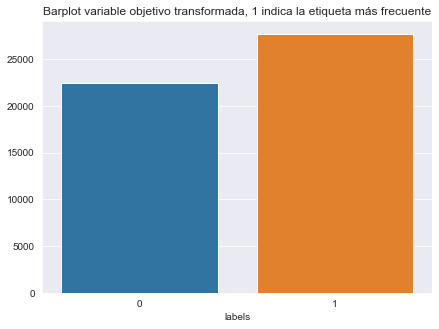

In [11]:
""" Volved a mostrar el barplot para la variable objetivo (labels) """

# codigo-alumno
x = pd_data.groupby([target]).size().sort_values(ascending=False) 
plt.figure(figsize = (7,5))
sns.barplot(x.index, x, orient='v')
plt.title('Barplot variable objetivo transformada, 1 indica la etiqueta más frecuente')
plt.show()

In [12]:
""" Separaremos las variables categóricas de las numéricas """


num_cols = ['duration', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate']
cat_cols = ['protocol_type', 'service', 'flag', 'logged_in']

pd_data[num_cols] = pd_data[num_cols].astype(float)

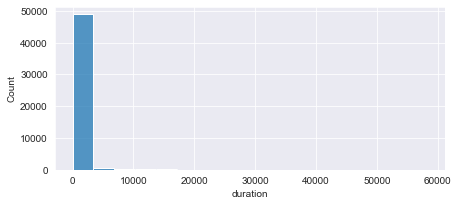

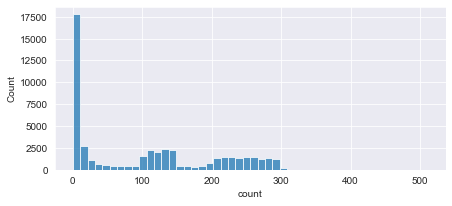

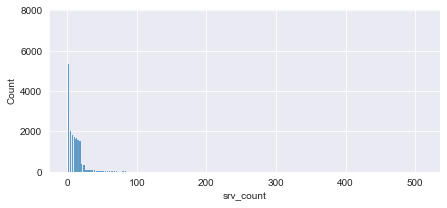

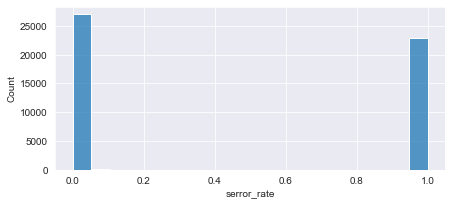

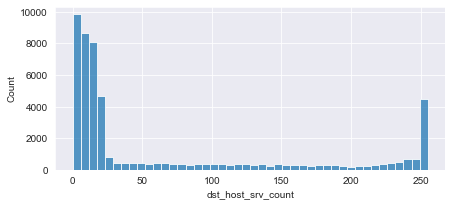

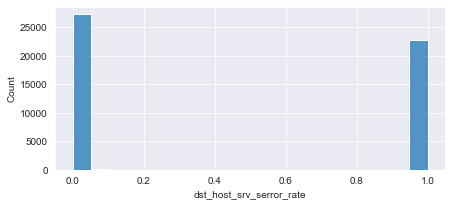

In [13]:
""" Mostrad un histograma por cada variable numérica """

# codigo-alumno

for num_col in num_cols:

    plt.figure(figsize = (7,3))
    sns.histplot(data =pd_data[num_col])
    plt.show()





In [14]:

# En esta celdilla, anticipándonos a la categorización de las variables numéricas, evaluamos si hay que eliminar o no 
# la variable duration, debido al desequilibrio mostrado en el barplot.


# La variable duration a pesar de estar desequilibrada, no se elimina al representar los no 0 más del 10% del total


print(pd_data.groupby('duration').size().sort_values(ascending=False))
print('Recordemos que el número de observaciones es: ' + str( len(pd_data['duration']))   ) 



duration
0.0        42875
1.0         1102
2.0          567
3.0          424
4.0          287
           ...  
2548.0         1
2547.0         1
2545.0         1
2543.0         1
58329.0        1
Length: 2353, dtype: int64
Recordemos que el número de observaciones es: 50177


In [15]:
""" Por la forma de los histogramas, podría ser un buen estudio convertir las variables
    numéricas a variables dummy, es lo que hareis en este apartado y, por tanto, pasarán 
    a ser categóricas todas las variables del dataframe. Esta parte será libre para el 
    estudiante. Deberá tomar la decisión que considere más apropiada para realizar esta 
    binarización """

# codigo-alumno

# Aquí se pide transformar pd_data, no hacer un pipeline. Descarto ColumnTransformer en este apartado ya que daría un
# np.array con el que luego actualizar pd_data. ColumnTransformer está pensado más para pipelines y en este ocasión encuentro
#más intuitiva la solución que muestro a continuación

# Las categorías deben quedar equilibradas lo máximo posible para reducir el riesgo de sobreajuste

binarizations =[]

for num_col in num_cols:

    threshold = np.median(pd_data[num_col])
    
    binarizations.append([num_col, Binarizer(threshold = threshold)])

    pd_data[num_col] = binarizations[-1][1].fit_transform(pd_data[[num_col]] )


# Las transformaciones se guardan en la lista binarizations, donde se pueden recuperar los parámetros usados con el comando:
# binarizations[-1][1].get_params()

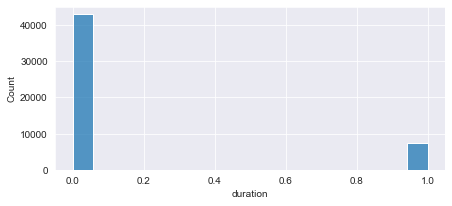

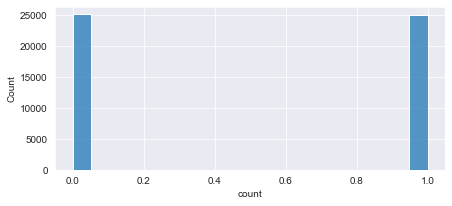

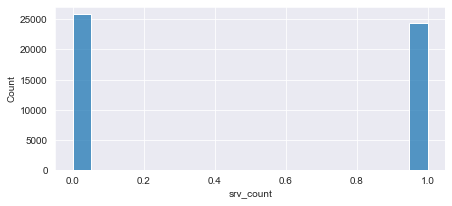

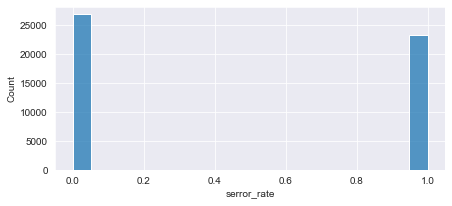

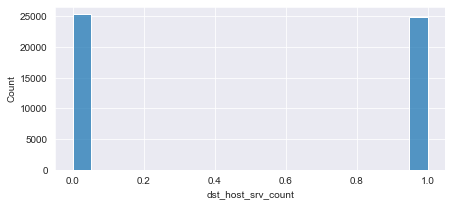

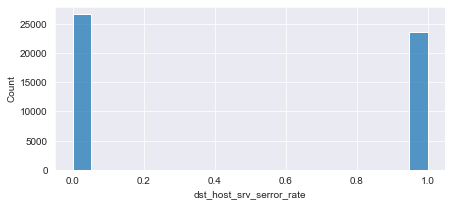

In [16]:
for num_col in num_cols:

    plt.figure(figsize = (7,3))
    sns.histplot(data =pd_data[num_col])
    plt.show()

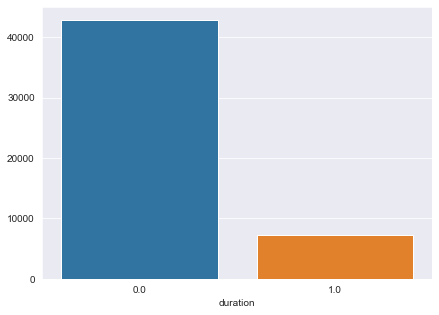

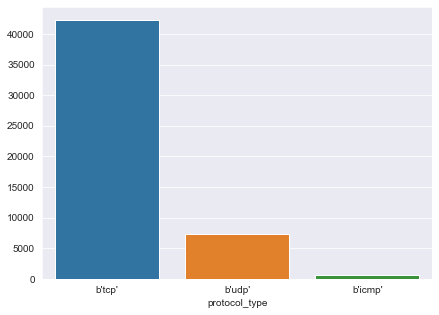

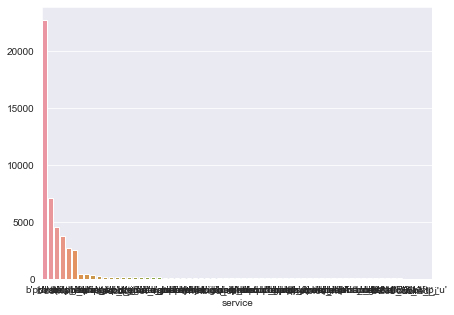

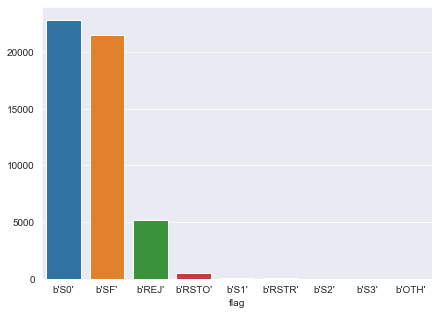

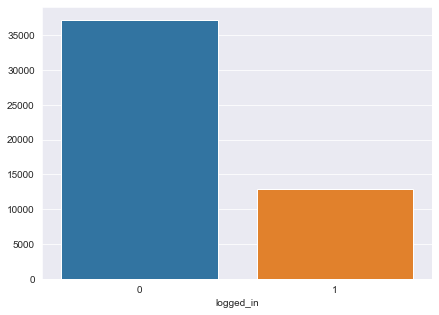

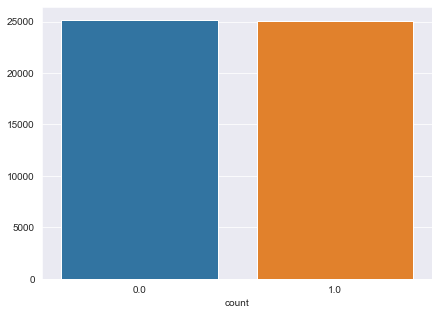

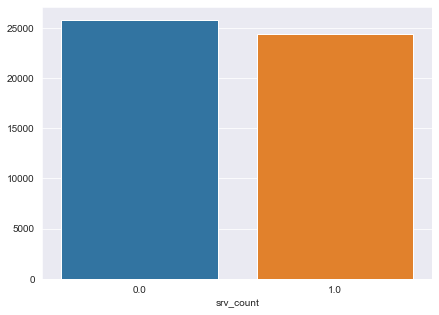

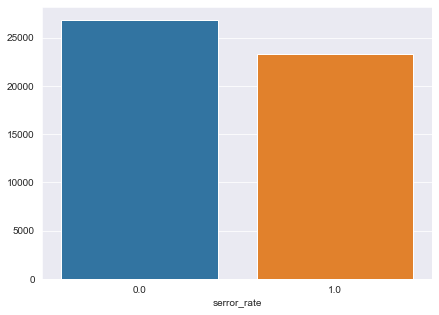

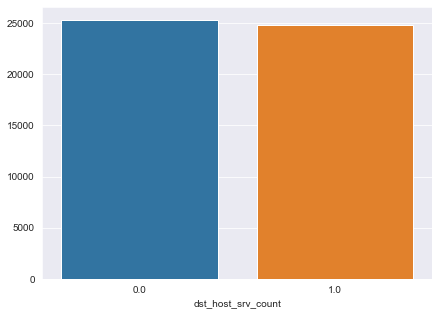

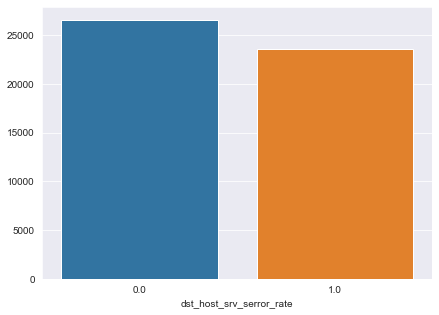

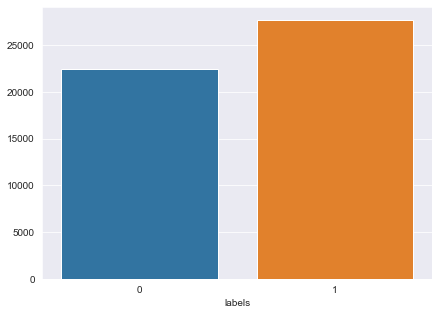

In [17]:
""" Mostrad un barplot por cada variable """

# codigo-alumno

for variable in pd_data.columns:    
    x = pd_data.groupby([variable]).size().sort_values(ascending=False) 
    plt.figure(figsize = (7,5))
    sns.barplot(x.index, x, orient='v')
    plt.show()
    
    
# La variable protocol_type precisará de un OneHotEncoder, al tomar valores tipo bytes y no 0-1.    


In [18]:
""" Transformad la variable service en una variable dummy que nos permitan identificar el servicio
    más frecuente frente al resto """

# codigo-alumno

pd_data.groupby('service').size().sort_values(ascending=False)


service
b'private'     22715
b'http'         7067
b'smtp'         4574
b'domain_u'     3799
b'other'        2677
               ...  
b'urh_i'          12
b'X11'             9
b'tim_i'           2
b'red_i'           1
b'tftp_u'          1
Length: 65, dtype: int64

In [19]:
x = pd_data.groupby(['service']).size().sort_values(ascending=False) 

etiqueta = x.index[0] # El servicio más frecuente

pd_data['service'] = (pd_data['service'] == etiqueta).astype('int') # 1 indica el servicio más frecuente




In [20]:
pd_data.groupby('service').size().sort_values(ascending=False) # comprobación

service
0    27462
1    22715
dtype: int64

In [21]:
""" Transformad la variable flag en dos variables dummy que nos permitan identificar 3 tipos de flags, 
    los dos más comunes y el resto """

# codigo-alumno

etiquetas = list (pd_data.groupby('flag').size().sort_values(ascending=False).index[:2] )# las dos flags más frecuentes

#transformo el resto de flag por 'resto'

pd_data.flag = pd_data.flag.apply(lambda row: row if row in etiquetas else 'resto')

pd_data.groupby('flag').size().sort_values(ascending=False)

flag
b'S0'    22846
b'SF'    21553
resto     5778
dtype: int64

In [22]:
flag_pd = pd.get_dummies(pd_data.flag, prefix='flag' ) # pongo drop_first como falso porque quiero eliminar la columna 'flag_ressto'

pd_data = pd.concat([pd_data, flag_pd], axis = 1) # juntamos ambos dataframes

pd_data.drop(columns=['flag', 'flag_resto'], axis=1, inplace=True) # eliminamos la variable flag y flag_resto

pd_data.head() # comprobación, solo aparecen  flag_b'S0' y flag_b'SF'


,duration,protocol_type,service,logged_in,count,srv_count,serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,labels,flag_b'S0',flag_b'SF'
0,0.0,b'tcp',0,1,0.0,0.0,0.0,0.0,0.0,0,0,1
1,0.0,b'tcp',0,1,0.0,0.0,0.0,1.0,0.0,0,0,1
2,0.0,b'tcp',0,1,0.0,0.0,0.0,1.0,0.0,0,0,1
3,0.0,b'tcp',0,1,0.0,0.0,0.0,1.0,0.0,0,0,1
4,0.0,b'tcp',0,1,0.0,0.0,0.0,1.0,0.0,0,0,1


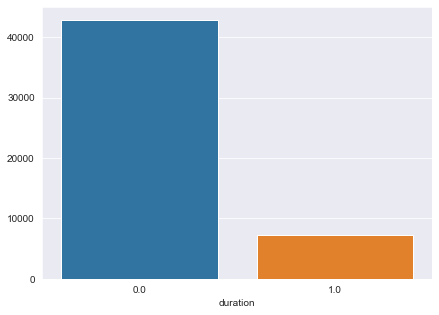

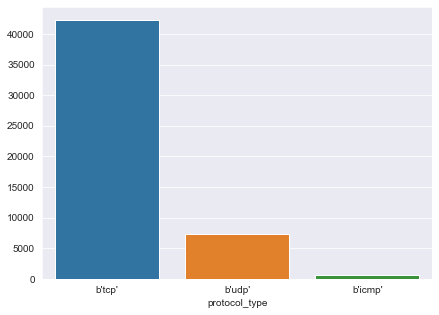

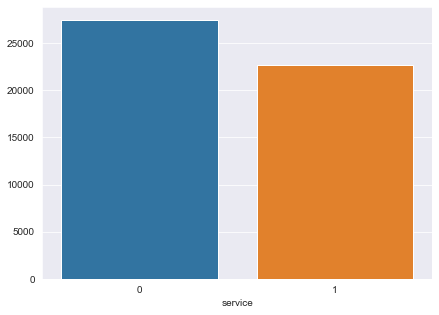

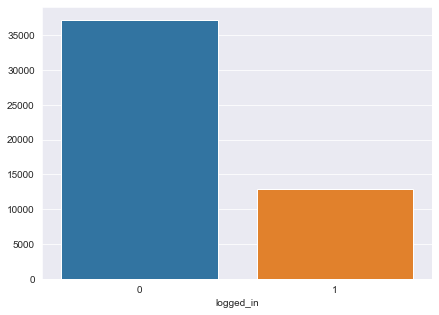

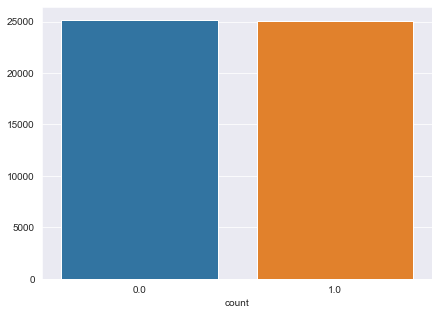

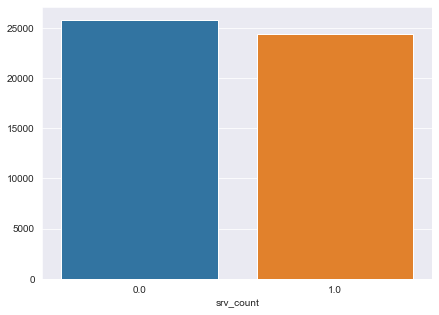

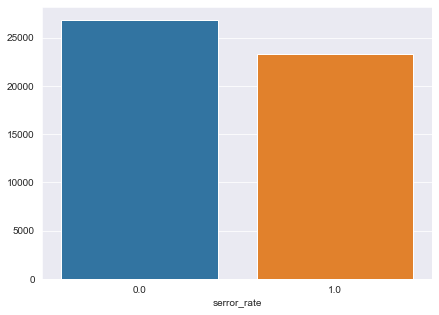

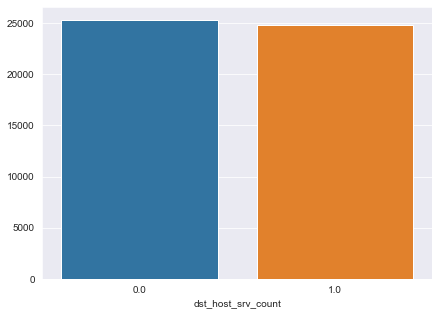

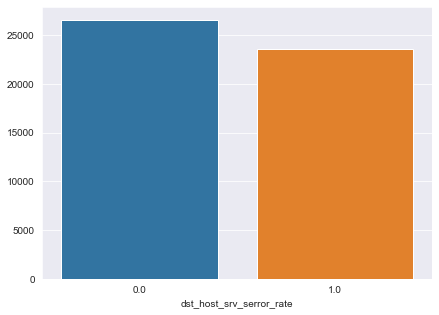

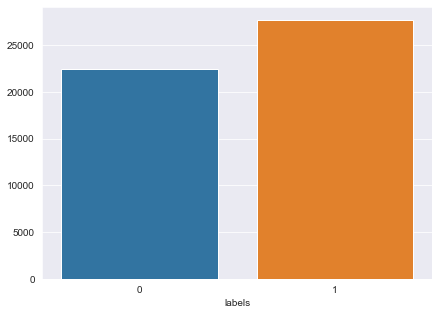

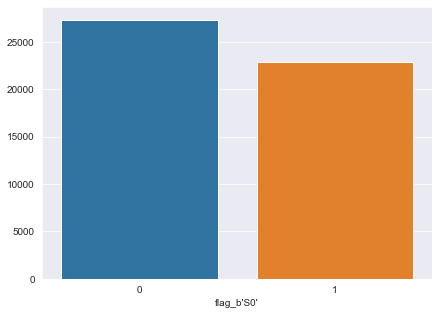

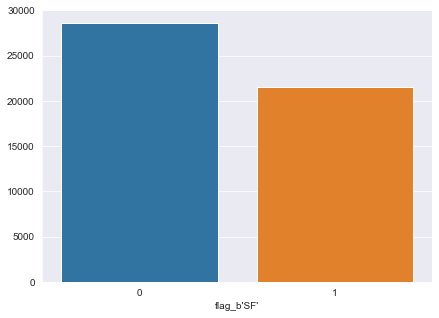

In [23]:
""" Volved a mostrad un barplot por cada variable """

# codigo-alumno

for variable in pd_data.columns:    
    x = pd_data.groupby([variable]).size().sort_values(ascending=False) 
    plt.figure(figsize = (7,5))
    sns.barplot(x.index, x, orient='v')
    plt.show()

**Añadido por alumno**

Hay una variable categórica, protocol_type, que aún queda por pasar a dummy. Tal operación se hará en el apartado **Model evaluation**. No obstante se procederá a hacer una transformación previa para agrupar las dos categorías menos frecuentes en una sola, la cual se llamará 'Otro'. El motivo es que una categoría tiene una frecuencia muy pequeña, sobre el 1%, que podría dar sobreajuste de los modelos resultantes.

Además se pasará del tipo bytes a str para evitar un futuro TypeError al aplicar OneHotEncoder en esta variable.

In [24]:
pd_data.groupby(['protocol_type']).size().sort_values(ascending=False)


protocol_type
b'tcp'     42280
b'udp'      7246
b'icmp'      651
dtype: int64

In [25]:
protocol_mas_frecuente = pd_data.groupby(['protocol_type']).size().sort_values(ascending=False).index[0]



pd_data.protocol_type = pd_data.protocol_type.apply(lambda row: 'Otro' if row != protocol_mas_frecuente else str(row))



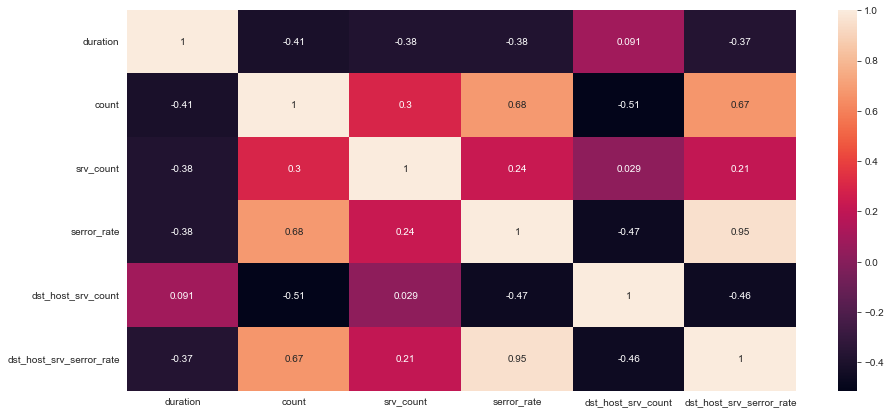

In [26]:
""" Mostrad un plot de correlaciones entre variables numéricas """

# codigo-alumno

# dependiendo de la versión de matplotlib, puede haber problemas con su representación. Por eso, adjunto también el pdf.

correlation_mat = pd_data[num_cols].corr()

plt.subplots(figsize=(15,7))
sns.heatmap(correlation_mat, annot = True, xticklabels=True, yticklabels=True)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

plt.show()


### Model evaluation

Cuestiones previas al model evaluation:
    
1) Se usan los modelos del ejercicio 1 incorporando además Gradient Boosting, un ensamblado que ha dado muy buenos resultados para problemas no lineales.

2) Se aplicarán dos  técnicas de selección son usadas para nval=1,2,3 siendo nval el número de features a escoger. Dichas técnicas son el RFE (wrapper) y SelectKBest (Stats filters).

3) Lo ideal sería hacer una mallado (grid) grueso de los hiperparámetros para todos los modelos y seleccionar unos pocos/el mejor. Después, realizar un mallado fino con los seleccionados para quedarnos finalmente el modelo ganador ajustado. En cualquier caso, se procede a realizar lo estipulado por el enunciado, correr >5 modelos con la tecnica de cv más aceptado. Es decir, el tuneado de los hiperparámetros no se contempla en este ejercicio. Dicho tuneo se realizaría con - por ejemplo - GridSearchCV como se hizo en el ejercicio 1.  


Respecto a la elección de la **técnica de validación cruzada**, el compromiso es **velocidad de computación vs riesgo overfitting**. El riesgo de sobreajuste aumenta cuando las clases están muy desbalanceadas. La forma de proceder es intentar disminuir la proporción de iteraciones donde el conjunto test no incluya/infrarrepresente las clases minoritarias. Hay dos métodos principales, aparte de usar cv con repetición en vez de una sola partición train-test, los cuales se pueden combinar:

1) Forzar a que en toda iteración se respeten las proporciones de la variable target en el conjunto test (y por tanto también en el train). Esto se llama 'stratified'.

2) 'Shuffle' en cada iteración.

Además, si los datos provienen de distintas fuentes que se han combinado para hacer el dataset, convendría usar también el método 'group'.

El problema de usar todas estas técnicas de reducción del overfitting (cv, stratified, shuffle y -si es el caso- group) es que aumenta el tiempo computacional. Por tanto, conviene observar cuán de desbalanceados están las clases de la variable target antes de aplicar/combinar estas técnicas.

En este ejercicio no se aplicará el método 'group' al asumir que todo el dataset proviene de una misma fuente, 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset, creada por el MIT Lincoln Lab.
(https://scikit-learn.org/stable/datasets/real_world.html#kddcup99-dataset)


Al ser un dataset ya bastante grande, con las dos clases de la variable target bastante balanceadas observando el barplot y, teniendo en cuenta la capacidad de computación disponible, se prescindirá del 'shuffle' antes de cada iteración y de la repetición en la cv. La técnica de cv a emplear será la **StratifiedKFold** ya que no es mucho más lenta que KFold, siendo más robusta frente al sobreajuste.

Las otros técnicas de cv no escogidas, se podrían utilizar en el posterior mallado fino de cara a elegir el modelo ganador.




LR_S1: 0.982024 (0.001403)
LDA_S1: 0.982024 (0.001403)
KNN_S1: 0.982024 (0.001403)
DTC_S1: 0.982024 (0.001403)
NB_S1: 0.982024 (0.001403)
RFC_S1: 0.982024 (0.001403)
SVM_S1: 0.982024 (0.001403)
GB_S1: 0.982024 (0.001403)
LR_R1: 0.982024 (0.001403)
LDA_R1: 0.982024 (0.001403)
KNN_R1: 0.982024 (0.001403)
DTC_R1: 0.982024 (0.001403)
NB_R1: 0.982024 (0.001403)
RFC_R1: 0.982024 (0.001403)
SVM_R1: 0.982024 (0.001403)
GB_R1: 0.982024 (0.001403)
LR_S2: 0.982024 (0.001403)
LDA_S2: 0.982024 (0.001403)
KNN_S2: 0.982024 (0.001403)
DTC_S2: 0.982024 (0.001403)
NB_S2: 0.982024 (0.001403)
RFC_S2: 0.982024 (0.001403)
SVM_S2: 0.982024 (0.001403)
GB_S2: 0.982024 (0.001403)
LR_R2: 0.982024 (0.001403)
LDA_R2: 0.982024 (0.001403)
KNN_R2: 0.982024 (0.001403)
DTC_R2: 0.982024 (0.001403)
NB_R2: 0.982024 (0.001403)
RFC_R2: 0.982024 (0.001403)
SVM_R2: 0.982024 (0.001403)
GB_R2: 0.982024 (0.001403)
LR_S3: 0.988262 (0.001335)
LDA_S3: 0.982024 (0.001403)
KNN_S3: 0.988262 (0.001335)
DTC_S3: 0.988262 (0.001335)
NB_S3

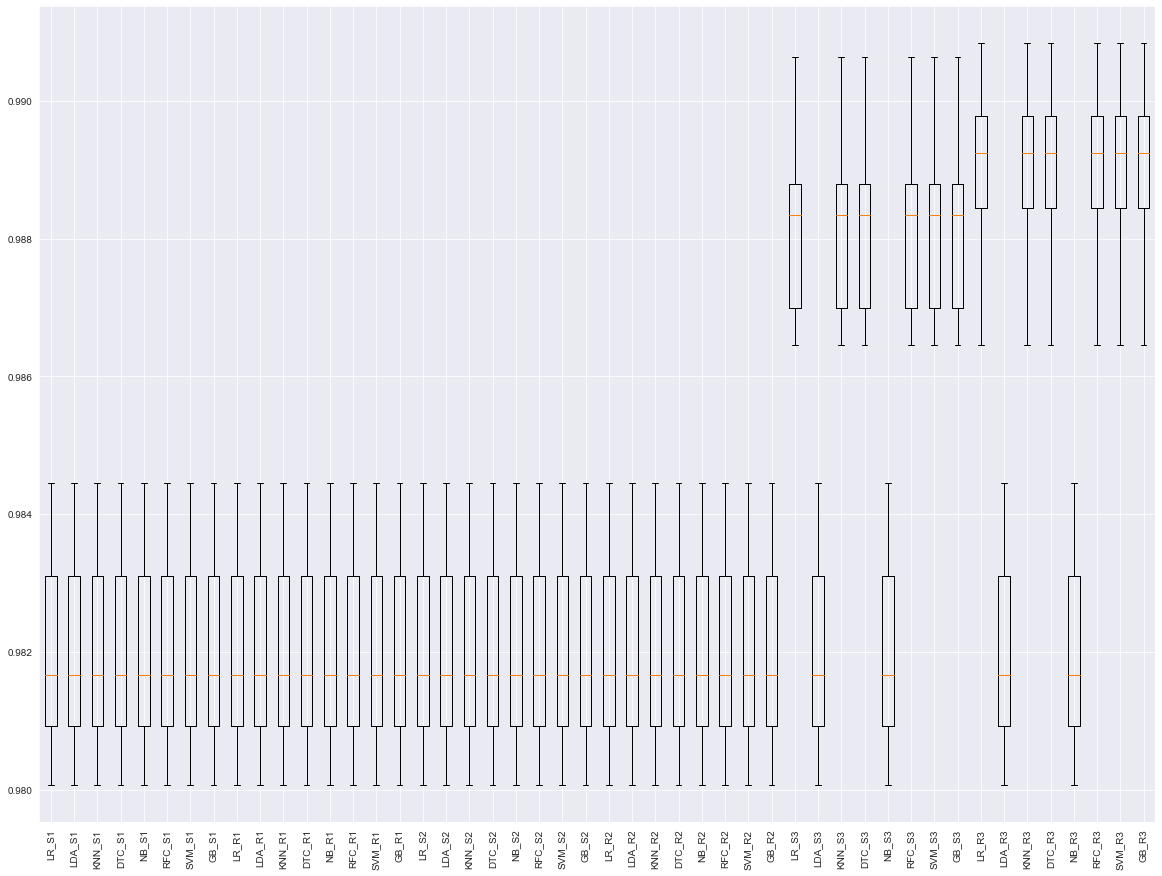

In [27]:
""" Realizad una evaluación de, al menos, cinco modelos de machine learning con
    la técnica de validación cruzada más acertada (10 splits). Además, se pide
    incorporar, al menos, una técnica de selección previa de las 1, 2 o 3 features que
    mejores resultados ofrezca (Nota, tendreis que usar OneHotEncoder para las variables 
    que tengan strings) """

X = pd_data.drop(target, axis=1) 
y = pd_data[target]

# codigo-alumno


def boxplots_algorithms_1(results, names): # mi versión de la función boxplots_algorithms
    
    plt.figure(figsize=(20,15))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.xticks(rotation = 90) # Al ser muchos modelos roto sus nombres para más legibilidad
    plt.show()




results = []
names = []
models = []
feature_selectors =[]


models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
models.append(('SVM', SVC()))
models.append(('GB', GradientBoostingClassifier(random_state=seed)))

col_transformer = ColumnTransformer([('OneHotEncoder',OneHotEncoder(drop='first'), ['protocol_type'])],'passthrough')


nvals =[1,2,3]

for nval in nvals:
        
        feature_selectors.append(
            [('_S'+str(nval), SelectKBest(k =nval)), 
            ('_R'+str(nval), RFE(LogisticRegression(random_state=seed), n_features_to_select=nval, step=1))]  )

        for name_selector, feature_selector in feature_selectors[-1]:# justo la lista que acabo de crear

            for name, model in models:

                pipeline = Pipeline([('OneHotEncoder_a_protocol', col_transformer), 
                                     ('feature_selection', feature_selector),                      
                                     ('model', model)])

                cv_technique = StratifiedKFold(n_splits=10,  shuffle=True, random_state = seed ) 
                cv_results = cross_val_score(pipeline, X, y, scoring= 'accuracy', cv = cv_technique)

                msg = "%s: %f (%f)" % (name + name_selector, cv_results.mean(), cv_results.std())
                print(msg)

                results.append(cv_results)
                names.append(name + name_selector)


            
boxplots_algorithms_1(results, names)            
            

El modelo a elegir sería regresión lineal con selección de las tres variables más relevantes escogidas por RFE. Este modelo tiene mayor/igual tasa de acierto que otros modelos con una varianza similar - además de ser un modelo muy descriptivo donde los coeficientes tienen un claro significado. En el boxplot, este modelo es el 'LR_R3'.

De nuevo la elección del modelo LR_R3 queda supeditada a las limitaciones de no haber hecho un grid search y del tipo de scoring escogido, como ya se indicó al final del ejercicio 1.


Del boxplot se observa que hay una variable dominante ya que la tasa de acierto con una sola variable input (S1/R1) es bastante similar a añadir dos o tres variables input. 

Además, parece que hay una relación bastante lineal entre dicha variable dominante y la variable objetivo ya que la tasa de acierto es alta para regresión logística. Esto se puede comprobar viendo en la correlación entre la variable dominante y la objetivo, como se muestran en siguientes celdillas.

En efecto, la variable más significativa es **'flag_b'SF''** con un coeficiente de correlación de casi -1 con la variable objetivo.

In [28]:
c = ColumnTransformer([('OneHotEncoder',OneHotEncoder(drop='first'), ['protocol_type'])],'passthrough').fit_transform(X)

a =RFE(LogisticRegression(random_state=seed), n_features_to_select=1, step=1)

a.fit(c,y).ranking_




array([ 5, 10,  3,  7,  2,  9, 11,  8,  6,  4,  1])

In [29]:
X.columns # ver qué variable tiene asignada el valor 1.

Index(['duration', 'protocol_type', 'service', 'logged_in', 'count',
       'srv_count', 'serror_rate', 'dst_host_srv_count',
       'dst_host_srv_serror_rate', 'flag_b'S0'', 'flag_b'SF''],
      dtype='object')

In [30]:
pd_data.corr()['labels']

duration                   -0.458537
service                     0.757011
count                       0.857906
srv_count                   0.279917
serror_rate                 0.797110
dst_host_srv_count         -0.606349
dst_host_srv_serror_rate    0.784908
labels                      1.000000
flag_b'S0'                  0.819632
flag_b'SF'                 -0.964150
Name: labels, dtype: float64

El Análisis de las correlación se ha efectuado para el feature selector RFE. SelectKBest también identifica **'flag_b'SF''** como la variable más importante como se puede ver a continuación. Se esparaba que ambos selectores de variables dieran los mismos/parecidos resultados en base a la similitud de las cajas en el boxplot.


In [31]:
c = ColumnTransformer([('OneHotEncoder',OneHotEncoder(drop='first'), ['protocol_type'])],'passthrough').fit_transform(X)

a =SelectKBest(k =1)

a.fit(c,y).scores_


array([ 15037.22,  13358.28,  67349.02,  37809.44, 139883.46,   4265.61,
        87435.4 ,  29172.99,  80516.25, 102703.07, 662381.87])